In [2]:
library(xlsx)
library(igraph)
library(dplyr)
library(Matrix)
library(tm)

setwd("~\dataset")
options(warn=-1)

# read all sheets from excel file to all list (memory = 2.1mb)

sunbelt <- list()
for(i in 1:9){
    sunbelt[[i]] <- read.xlsx("pfeffer_data.xlsx", sheetIndex = i)
}

# how to delete NA.. variables? 
sunbelt[[1]] <- sunbelt[[1]][,c(1:11)]
sunbelt[[6]] <- sunbelt[[6]][,c(1:3)]

In [19]:
head(sunbelt[[3]],5)
kw <- subset(sunbelt[[3]],sunbelt[[3]]$Type != "Poster")

kwBipart <- spMatrix(length(unique(kw$Keyword)),
                     length(unique(kw$ID)),
                     a <- as.numeric(factor(kw$Keyword)),
                     b <- as.numeric(factor(kw$ID)),
                     x = rep(1,length(as.numeric(kw$Keyword))))
  
row.names(kwBipart) <- levels(factor(kw$Keyword))
colnames(kwBipart) <- levels(factor(kw$ID))
  
kwBipart <- as.matrix(kwBipart) # basic format of incidence data set
  
bn <- graph.incidence(kwBipart)
bn.pr <- bipartite.projection(bn)
adj_kw <- get.adjacency(bn.pr$proj1,sparse=FALSE,att="weight")
  
graph_kw <- graph_from_adjacency_matrix(adj_kw,weighted="NULL",mode="undirected",diag=FALSE)

unique(kw$Keyword)

ID,Type,Keyword
2,Paper,Inter-organizational Networks
2,Paper,others
2,Paper,Social Capital
5,Paper,Dynamic Network Analysis
6,Paper,Inter-organizational Networks


[1] Inter-organizational Networks   others                         
  [3] Social Capital                  Dynamic Network Analysis       
  [5] Methods                         Network Measurement            
  [7] Centrality                      Culture                        
  [9] Diffusion                       Economic Networks              
 [11] Geography                       Homophily                      
 [13] International Networks          Structural Holes               
 [15] Trust                           Weak Ties                      
 [17] Network Theory                  Influence                      
 [19] Online Networks                 Political Networks             
 [21] Public Health                   Community                      
 [23] Education                       Social Media                   
 [25] Visualization                   Mental Health                  
 [27] Resilience                      Social Support                 
 [29] 2-Mode Networks                 Interlocking Directorates      
 [31] Siena                           Large-scale Networks           
 [33] Longitudinal Analysis           Peer Influence                 
 [35] Social Influence                Affiliation Networks           
 [37] Academic Networks               Qualitative Approaches         
 [39] ERGM/P*                         Health                         
 [41] Advice Networks                 Intra-organizational Networks  
 [43] Knowledge                       Cooperation                    
 [45] Actor-Based Stochastic Modeling Adolescents                    
 [47] Friendship                      Communication                  
 [49] Governance                      Mixed Methods                  
 [51] Teams                           Multilevel Analysis            
 [53] Co-Evolution Model              Co-authorship Networks         
 [55] Egocentric Networks             Information                    
 [57] Embeddedness                    Brokerage                      
 [59] Dark Networks                   Collaboration                  
 [61] Evolution                       Scientific Networks            
 [63] Strong Ties                     Innovation                     
 [65] Citation Networks               Social Movements               
 [67] Personality                     Exponential Random Graph Model 
 [69] Crime Networks                  Agent Based Models             
 [71] Simulation                      Ethnography                    
 [73] Careers                         Kinship                        
 [75] Software                        Statistics                     
 [77] Structure                       Sampling                       
 [79] Semantic Networks               Collective Action              
 [81] Blockmodelling                  Core/Periphery                 
 [83] Neighborhoods                   Alliances                      
 [85] Schools                         HIV                            
 [87] Sex                             Clustering                     
 [89] Game Theory                     Modelling                      
 [91] Twitter                         Leadership                     
 [93] Sports                          Distribution                   
 [95] Data Collection                 Gender                         
 [97] Covert                          Data Mining                    
 [99] Cognitive Networks              Small World                    
100 Levels: 2-Mode Networks ... Weak Ties

(FYI: 앞선 내용과 중복이 되는 내용은 제외하였습니다) Paper 상에서 Keyword 간의 네트워크를 구성하기 위하여 sunbelt[[3]] data set 내에서 Keywords를 기반으로 하는 graph list를 구성하였습니다. Keywords들의 네트워크는 아래와 같은 모습을 합니다.

짧게 코드에 대해 설명을 하면

bn <- graph.incidence(kwBipart) & bn.pr <- bipartite.projection(bn): /sunbelt[[3]] 내에서 Paper ID와 Key words를 바탕으로 두 개의 Column을 추출한 뒤 이에 graph list로 만들기 위해 bipartite 형식으로 데이터를 수정하였습니다.

adj_kw <- get.adjacency(bn.pr$proj1,sparse=FALSE,att="weight"): 이를 통해 proj1의 경우 keywords를 기준으로 keywords가 paper에 얼마나 동시에 등장했는지를 기준으로 adjacency network를 만들어내게 되고, proj2의 경우는 paper가 keywords를 기준으로 얼마나 겹치게 되는지를 만들어내게 됩니다. 

graph_kw <- graph_from_adjacency_matrix(adj_kw,weighted="NULL",mode="undirected",diag=FALSE): 최종적으로 adjacency matrix를 구해낸 다음 이를 다시 graph list의 형태로 저장을 하게 되면, igraph 상에서 측정 할 수 있는 centrality를 모두 구할 수 있습니다.

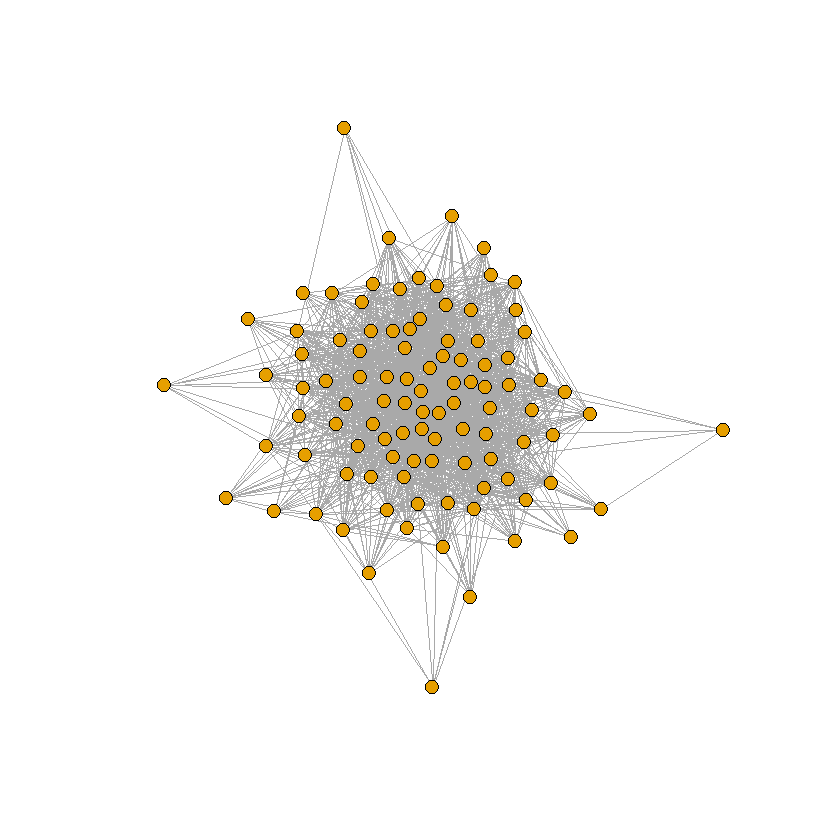

In [20]:
plot(graph_kw, 
     vertex.label = NA, 
     vertex.size=5, 
     vertex.label.dist=1, 
     width=10)

비교적 Keywords 간에는 빽빽하게 연결이 되어 있음을 알 수 있습니다. 이는 sunbelt conference에서 발표된 연구들은 비교적 유사한 연구 주제를 갖고 발표를 했음을 알 수 있습니다. 그렇다면 2013년에는 어떠한 keywords가 가장 많이 언급이 되었을까요? 

In [102]:
NROW(unique(kw$Keyword)) # may return 100
head(sort(table(kw$Keyword),decreasing=TRUE),20)
countTable <- as.data.frame(table(kw$Keyword))
names(countTable)[1] <- c("keyword") # change the first column name 

[1] 100


Inter-organizational Networks                Social Capital 
                           76                            73 
          Egocentric Networks               2-Mode Networks 
                           70                            60 
     Dynamic Network Analysis            Political Networks 
                           59                            55 
                Collaboration                        others 
                           53                            53 
                Communication                 Mixed Methods 
                           51                            50 
        Longitudinal Analysis               Online Networks 
                           47                            47 
                   Innovation             Economic Networks 
                           44                            43 
Intra-organizational Networks                Network Theory 
                           43                            42 
                    Com

Sunbelt 2013 당시 keywords의 개수는 총 100개입니다. 이 중에서 상위 20개의 언급된 부분을 추출하였습니다. 아마 가장 많이 언급된 keywords일수록 keywords network에서도 높은 중심성을 차지하겠지만, 확인해보도록 하겠습니다. 저는 keywords 들에 대한 eigenvector centrality를 측정하도록 하겠습니다. 

***이유와 eigenvector centrality에 대한 설명을 덧붙여야 한다***

In [43]:
eigenCen <- eigen_centrality(graph_kw) # measure eigenvector centrality (Bonacich, 1987)

In [97]:
head(sort(eigenCen$vector,decreasing=TRUE),20)
egTable <- cbind(as.data.frame(attributes(eigenCen$vector)),as.data.frame(eigenCen$vector))
# from list file, each eigen Centrality score has its attributes, which is keyword
# however, when extract list file to transform dataframe, these attributes will be lost
# therefore, i include attributes(eigenCen$vector) 
# reference: http://adv-r.had.co.nz/Data-structures.html

names(egTable) <- c("keyword","eigenCen")

Social Capital Inter-organizational Networks 
                    1.0000000                     0.9543932 
     Dynamic Network Analysis               2-Mode Networks 
                    0.9304788                     0.9171089 
           Political Networks         Longitudinal Analysis 
                    0.8876349                     0.8853254 
                Communication                     Community 
                    0.8826151                     0.8776006 
                       others                 Collaboration 
                    0.8758341                     0.8561350 
          Egocentric Networks                     Structure 
                    0.8473027                     0.8438920 
               Network Theory               Online Networks 
                    0.8331659                     0.8187370 
                Mixed Methods                     Homophily 
                    0.8103865                     0.7995476 
Intra-organizational Networks                    Innovation 
                    0.7950416                     0.7865104 
       International Networks             Economic Networks 
                    0.7852778                     0.7342533

In [101]:
kwTable <- merge(x=countTable, y=egTable, by='keyword', all=TRUE)
cor(kwTable$Freq,kwTable$eigenCen)

[1] 0.9105606

list 파일을 data frame으로 변경하는 과정에 시간이 오래 걸렸습니다. 그러한 이유는 list 내의 object마다 attribution을 지정할 수 있는데, 이들을 data frame의 형식으로 만들 경우에 list의 attribute를 옆 column에 붙여서 반환을 합니다. 저는 이러한 attribution이 data frame 내에서 새로운 하나의 column으로 잡히는 줄 알았는데, 알고 보니 data frame은 list로부터 반환했던 하나의 column만을 인식을 하고, 해당 attribute의 경우는 data frame 상에서 column으로 잡히지 않았습니다 (df[0]으로 해야 확인을 할 수 있었음).

그로 인하여 keyword로 merge를 하려고 했는데 문제가 발생하여 attribute(list\$object) + list\$object를 통하여 하나의 dataframe으로 만들 수 있었습니다. 

여튼, eigenCentrality와 단순 frequency 를 merge한 뒤에 correlation을 살펴보니 .91이 나왔습니다. 즉, 많이 언급된 keyword는 사실상 높은 eigen centrality를 확보하고 있음을 알 수 있습니다.

**다음으로 Paper간의 Network를 구해보고자 합니다**
이는 간단하게 앞서 구했던 bn.pr\$proj1 대신에 bn.pr\$proj2로 대신하면 구할 수 있습니다. 그래프까지 그리도록 하겠습니다.

In [109]:
adj_paper <- get.adjacency(bn.pr$proj2,sparse=FALSE,att="weight")
graph_paper <- graph_from_adjacency_matrix(adj,weighted="NULL",mode="undirected",diag=FALSE)

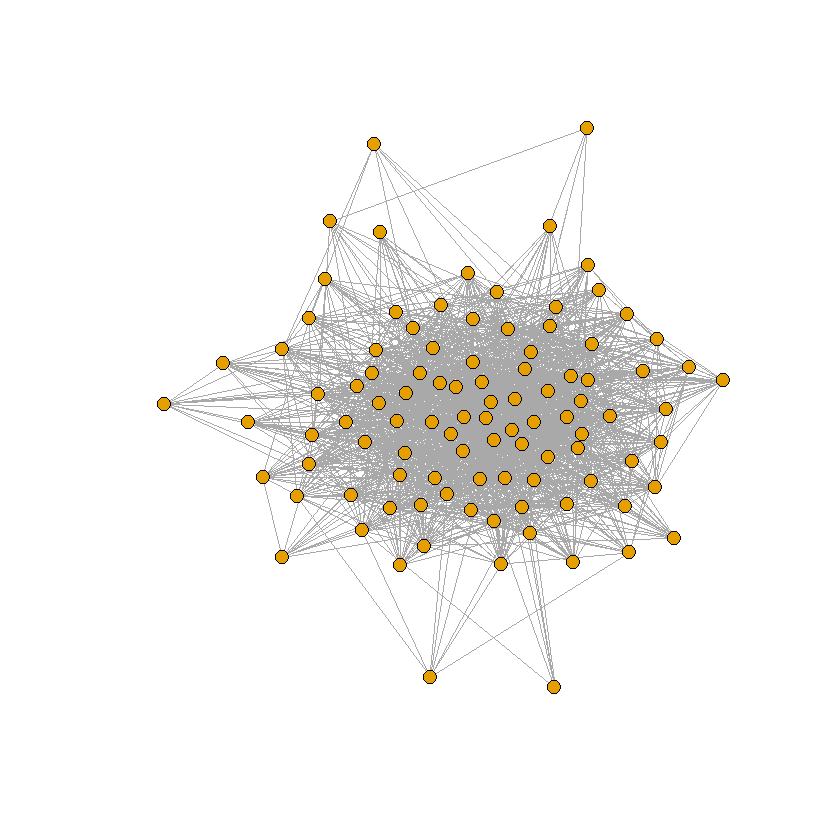

In [110]:
plot(graph_paper, 
     vertex.label = NA, 
     vertex.size=5, 
     vertex.label.dist=1, 
     width=10)

사실 별 의미가 없어보입니다. 아무래도 Paper간의 similarity를 구하는 게 낫지 않을까 생각이 됩니다.

**유사도 measure에 대해 알아볼 필요가 있습니다**

In [122]:
paperBipart <- as.data.frame(t(kwBipart)) # transpose KwBipart & transform to dataframe
head(paperBipart)

,2-Mode Networks,Academic Networks,Actor-Based Stochastic Modeling,Adolescents,Advice Networks,Affiliation Networks,Agent Based Models,Alliances,Blockmodelling,Brokerage,...,Sports,Statistics,Strong Ties,Structural Holes,Structure,Teams,Trust,Twitter,Visualization,Weak Ties
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [108]:
# Analyzing abstract
head(sunbelt[[6]],3)

ID,Type,Abstract
2,Paper,Inter-religious dialogue is to be considered as key issue for preventing conflict and supporting peaceful coexistence in a pluralistic and heterogeneous society. This is also expressed by the great efforts that have been made by inter-governmental organizations developing practical guidance and policy recommendations. For example the governments of the 47 member states of the Council of Europe (2008: 24) emphasized the relevance of interreligious dialogue in a â€White Paper on Intercultural Dialogueâ€œ by stating: â€Interreligious dialogue can also contribute to a stronger consensus within society regarding the solutions to social problemsâ€œ. But what does this mean concretely? To what extent are religious communities actually in contact with each other and what are their potentials for creating interreligious social capital on a local level? The paper draws on the results of a quantitative questioning of religious communities in Hamburg carried out within the project â€œReligion and Dialogue in Modern Societies. Interdisciplinary and internationally comparative studies on the possibilities and limitations of interreligious dialogueâ€œ funded by the German Federal Ministry for Education (BMBF).
5,Paper,I report on various field experiments I have conducted with various collaborators. In each experiment we test the preferential attachment thesis that the probability of attachment is proportional to the degree of the target actor. Observational studies make it difficult to identify a causal feedback effect of network degree on itself because the naturally higher attachment rate of more attractive actors produce spurious correlations between attachment events in longitudinal records. We constructed an experimental design that overcomes this difficulty and deployed this design in four naturally occurring systems. Our findings show that in each system initial ties formed through experimental intervention had a significant positive effect on later attachment.
6,Paper,"His presentation focuses on the interorganizational networks and adaptive capacity among nonprofit organizations in a southeastern state. In broad terms, adaptive capacity is defined as a function of interorganizational social capital and learning at the organizational and network level. The study examines the role of preexisting friendship ties and past collaborative dyadic ties on building new collaborative ties among small nonprofits. We used quadratic assignment procedure (QAP) to analyze relational data that was collected as part of a federally funded project. Findings support the literature, showing that organizations are likely to revitalize their past collaborative ties due to a high level of trust and positive reputation. Preexisting friendship ties, on the other hand, had a relatively weak influence on nonprofit collaborative dyadic tie building. The study contributes to teh use of network analysis in a context of nonprofit capacuty building."


Sunbelt 2013 Conference에서 발표된 연구들의 Abstract를 바탕으로 Text mining을 할 예정입니다.